# Heavy-tailed jumps induce intermittent patterns and gradual transitions in interacting cell populations

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

## Long jump simulation snapshots

In [27]:
# parameters
sze=300
s=5
# jumpm=300
pini=0.34
sens=0.25
# tmax=10000
tmax=1000

In [28]:
# arrays
lold=np.zeros((sze,2))
lnew=np.zeros((sze,2))
kymog=np.zeros((sze,tmax))

In [29]:
# initial conditions
places=np.random.uniform(size=(sze,2))
for j in range(sze):
    for k in range(2):
        if places[j,k]<pini:
            lold[j,k]=1

In [30]:
# number of cells
ncells=np.sum(lold)

In [31]:
# main loop (block migration)
# for t in range(tmax):
#     kymog[:,t]=np.sum(lold,1)
#     reorients=np.random.uniform(size=int(ncells))
# #     jumps=sts.zipfian.rvs(s,jumpm,size=(sze,2))
#     jumps=sts.zipf.rvs(s,size=(sze,2))
#     cellno=0
#     for j in range(sze):
#         nr=int(np.sum(lold[j,:]))
#         leftcs=0
#         rightcs=0
#         if nr>0:
#             nright=np.sum(lold[(j+1)%sze,:])
#             nleft=np.sum(lold[(j-1)%sze,:])
#             pright=np.exp(sens*(nright-nleft))/(2*np.cosh(sens*(nright-nleft)))
#             for k in range(nr):
#                 if reorients[cellno]<pright:
#                     rightcs+=1
#                     cellno+=1
#                 else:
#                     leftcs+=1
#                     cellno+=1
#         lnew[(j+jumps[j,0])%sze,0]+=rightcs
#         lnew[(j-jumps[j,1])%sze,1]+=leftcs
#     lold=np.copy(lnew)
#     lnew=np.zeros((sze,2))

In [32]:
# main loop (single cell migration)
for t in range(tmax):
    kymog[:,t]=np.sum(lold,1)
    reorients=np.random.uniform(size=int(ncells))
    #jumps=sts.zipfian.rvs(s,jumpm,size=(sze,2))
    jumps=sts.zipf.rvs(s,size=int(ncells))
    cellno=0
    for j in range(sze):
        nr=int(np.sum(lold[j,:]))
        if nr>0:
            nright=np.sum(lold[(j+1)%sze,:])
            nleft=np.sum(lold[(j-1)%sze,:])
            pright=np.exp(sens*(nright-nleft))/(2*np.cosh(sens*(nright-nleft)))
            for k in range(nr):
                if reorients[cellno]<pright:
                    lnew[(j+jumps[cellno])%sze,0]+=1
                    cellno+=1
                else:
                    lnew[(j-jumps[cellno])%sze,1]+=1
                    cellno+=1
    lold=np.copy(lnew)
    lnew=np.zeros((sze,2))

In [33]:
# main loop (single jump)
# for t in range(tmax):
#     kymog[:,t]=np.sum(lold,1)
#     reorients=np.random.uniform(size=int(ncells))
# #     jumps=sts.zipfian.rvs(s,jumpm,size=(sze,2))
# #     jumps=sts.zipf.rvs(s,size=(sze,2))
#     cellno=0
#     for j in range(sze):
#         nr=int(np.sum(lold[j,:]))
#         leftcs=0
#         rightcs=0
#         if nr>0:
#             nright=np.sum(lold[(j+1)%sze,:])
#             nleft=np.sum(lold[(j-1)%sze,:])
#             pright=np.exp(sens*(nright-nleft))/(2*np.cosh(sens*(nright-nleft)))
#             for k in range(nr):
#                 if reorients[cellno]<pright:
#                     rightcs+=1
#                     cellno+=1
#                 else:
#                     leftcs+=1
#                     cellno+=1
#         lnew[(j+1)%sze,0]+=rightcs
#         lnew[(j-1)%sze,1]+=leftcs
#     lold=np.copy(lnew)
#     lnew=np.zeros((sze,2))

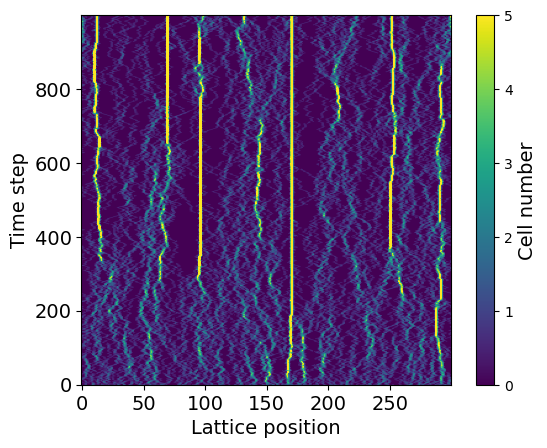

In [34]:
fig, ax = plt.subplots()
pone=ax.imshow(np.transpose(kymog),aspect=0.3,origin='lower')
pone.set_clim(0,5)
cbone=fig.colorbar(pone)
cbone.set_label("Cell number",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Lattice position",fontsize=14)
plt.ylabel("Time step",fontsize=14)
plt.show()

## Long jump fixed density, varying sensitivity and decay parameter mean entropy calculations
### Block migration

In [ ]:
# parameters
sze=300
# jumpm=300
pini=0.34
# tmax=10000
tmax=500

senses=np.linspace(0,0.5,num=20)
decays=np.linspace(1.5,8,num=6)
iters=50
avgv=np.zeros((len(decays),len(senses)))

for r in range(iters):
    cb=0
    for beta in senses:
        cs=0
        for spar in decays:
            entro=0
            lold=np.zeros((sze,2))
            lnew=np.zeros((sze,2))
            places=np.random.uniform(size=(sze,2))
            for j in range(sze):
                for k in range(2):
                    if places[j,k]<pini:
                        lold[j,k]=1
            ncells=np.sum(lold)
            for t in range(tmax):
                reorients=np.random.uniform(size=int(ncells))
                jumps=sts.zipf.rvs(spar,size=(sze,2))
                cellno=0
                for j in range(sze):
                    nr=int(np.sum(lold[j,:]))
                    leftcs=0
                    rightcs=0
                    if nr>0:
                        if t==tmax-1:
                            entro-=(nr/ncells)*np.log(nr/ncells)
                        nright=np.sum(lold[(j+1)%sze,:])
                        nleft=np.sum(lold[(j-1)%sze,:])
                        pright=np.exp(beta*(nright-nleft))/(2*np.cosh(beta*(nright-nleft)))
                        for k in range(nr):
                            if reorients[cellno]<pright:
                                rightcs+=1
                                cellno+=1
                            else:
                                leftcs+=1
                                cellno+=1
                    lnew[(j+jumps[j,0])%sze,0]+=rightcs
                    lnew[(j-jumps[j,1])%sze,1]+=leftcs
                lold=np.copy(lnew)
                lnew=np.zeros((sze,2))
            avgv[cs,cb]+=entro/iters
            cs+=1
        cb+=1

In [ ]:
print(decays)

[1.5 2.8 4.1 5.4 6.7 8. ]


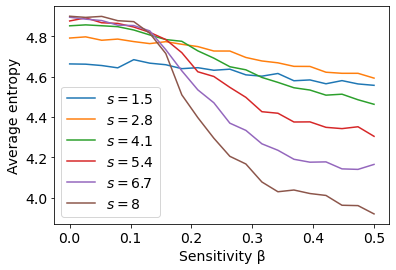

In [ ]:
plt.plot(senses,avgv[0,:],label='$s=1.5$')
plt.plot(senses,avgv[1,:],label='$s=2.8$')
plt.plot(senses,avgv[2,:],label='$s=4.1$')
plt.plot(senses,avgv[3,:],label='$s=5.4$')
plt.plot(senses,avgv[4,:],label='$s=6.7$')
plt.plot(senses,avgv[5,:],label='$s=8$')
plt.xlabel("Sensitivity β",fontsize=14)
plt.ylabel("Average entropy",fontsize=14)
plt.legend(fontsize="14")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('blockmig-good.pdf')
plt.show()

### Cell-wise migration

In [ ]:
# parameters
sze=300
# jumpm=300
pini=0.34
# tmax=10000
tmax=500

senses=np.linspace(0,0.5,num=20)
decays=np.linspace(1.5,8,num=6)
iters=50
avgc=np.zeros((len(decays),len(senses)))

for r in range(iters):
    cb=0
    for beta in senses:
        cs=0
        for spar in decays:
            entro=0
            lold=np.zeros((sze,2))
            lnew=np.zeros((sze,2))
            places=np.random.uniform(size=(sze,2))
            for j in range(sze):
                for k in range(2):
                    if places[j,k]<pini:
                        lold[j,k]=1
            ncells=np.sum(lold)
            for t in range(tmax):
                reorients=np.random.uniform(size=int(ncells))
                jumps=sts.zipf.rvs(spar,size=int(ncells))
                cellno=0
                for j in range(sze):
                    nr=int(np.sum(lold[j,:]))
                    leftcs=0
                    rightcs=0
                    if nr>0:
                        if t==tmax-1:
                            entro-=(nr/ncells)*np.log(nr/ncells)
                        nright=np.sum(lold[(j+1)%sze,:])
                        nleft=np.sum(lold[(j-1)%sze,:])
                        pright=np.exp(beta*(nright-nleft))/(2*np.cosh(beta*(nright-nleft)))
                        for k in range(nr):
                            if reorients[cellno]<pright:
                                lnew[(j+jumps[cellno])%sze,0]+=1
                                cellno+=1
                            else:
                                lnew[(j-jumps[cellno])%sze,1]+=1
                                cellno+=1
                lold=np.copy(lnew)
                lnew=np.zeros((sze,2))
            avgc[cs,cb]+=entro/iters
            cs+=1
        cb+=1

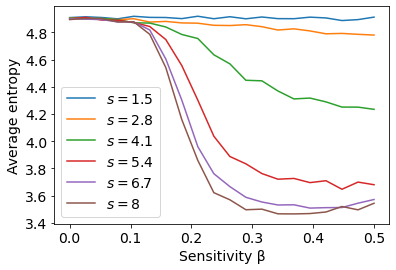

In [ ]:
plt.plot(senses,avgc[0,:],label='$s=1.5$')
plt.plot(senses,avgc[1,:],label='$s=2.8$')
plt.plot(senses,avgc[2,:],label='$s=4.1$')
plt.plot(senses,avgc[3,:],label='$s=5.4$')
plt.plot(senses,avgc[4,:],label='$s=6.7$')
plt.plot(senses,avgc[5,:],label='$s=8$')
plt.xlabel("Sensitivity β",fontsize=14)
plt.ylabel("Average entropy",fontsize=14)
plt.legend(fontsize="14")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('singlemig-good.pdf')
plt.show()

## Long jump fixed decay parameter, varying sensitivity and density mean entropy calculations
### Cell-wise migration

In [7]:
# parameters
sze=300
# jumpm=300
spar=6
# tmax=10000
tmax=500

senses=np.linspace(0,0.5,num=20)
pinis=np.linspace(0.1,0.7,num=20)
iters=50
avgc=np.zeros((len(pinis),len(senses)))

for r in range(iters):
    cb=0
    for beta in senses:
        cs=0
        for pini in pinis:
            entro=0
            lold=np.zeros((sze,2))
            lnew=np.zeros((sze,2))
            places=np.random.uniform(size=(sze,2))
            for j in range(sze):
                for k in range(2):
                    if places[j,k]<pini:
                        lold[j,k]=1
            ncells=np.sum(lold)
            for t in range(tmax):
                reorients=np.random.uniform(size=int(ncells))
                jumps=sts.zipf.rvs(spar,size=int(ncells))
                cellno=0
                for j in range(sze):
                    nr=int(np.sum(lold[j,:]))
                    leftcs=0
                    rightcs=0
                    if nr>0:
                        if t==tmax-1:
                            entro-=(nr/ncells)*np.log(nr/ncells)
                        nright=np.sum(lold[(j+1)%sze,:])
                        nleft=np.sum(lold[(j-1)%sze,:])
                        pright=np.exp(beta*(nright-nleft))/(2*np.cosh(beta*(nright-nleft)))
                        for k in range(nr):
                            if reorients[cellno]<pright:
                                lnew[(j+jumps[cellno])%sze,0]+=1
                                cellno+=1
                            else:
                                lnew[(j-jumps[cellno])%sze,1]+=1
                                cellno+=1
                lold=np.copy(lnew)
                lnew=np.zeros((sze,2))
            avgc[cs,cb]+=entro/iters
            cs+=1
        cb+=1

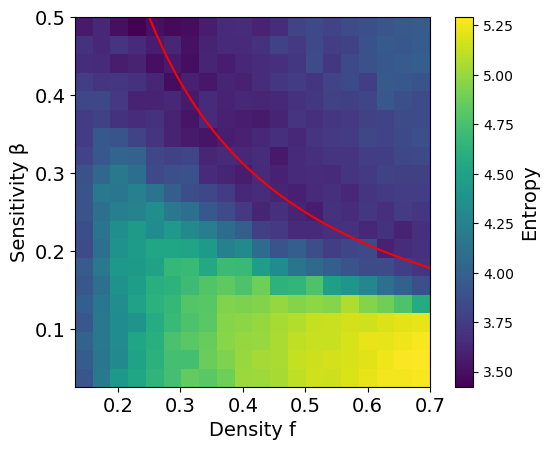

In [36]:
fig, ax = plt.subplots()
pheat=ax.imshow(np.transpose(avgc),aspect=5/4,origin='lower',extent=[pinis[1],pinis[-1],senses[1],senses[-1]])
# pheat.set_clim(3.8,5.2)
cbone=fig.colorbar(pheat)
cbone.set_label("Entropy",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Sensitivity β",fontsize=14)
plt.xlabel("Density f",fontsize=14)
plt.plot(np.linspace(0.25,0.7,50),np.power(8*np.linspace(0.25,0.7,50),-1),'r')
plt.show()

### Block migration

In [37]:
# parameters
sze=300
# jumpm=300
spar=6
# tmax=10000
tmax=500

senses=np.linspace(0,0.5,num=20)
pinis=np.linspace(0.1,0.7,num=20)
iters=50
avgcb=np.zeros((len(pinis),len(senses)))

for r in range(iters):
    cb=0
    for beta in senses:
        cs=0
        for pini in pinis:
            entro=0
            lold=np.zeros((sze,2))
            lnew=np.zeros((sze,2))
            places=np.random.uniform(size=(sze,2))
            for j in range(sze):
                for k in range(2):
                    if places[j,k]<pini:
                        lold[j,k]=1
            ncells=np.sum(lold)
            for t in range(tmax):
                reorients=np.random.uniform(size=int(ncells))
                jumps=sts.zipf.rvs(spar,size=(sze,2))
                cellno=0
                for j in range(sze):
                    nr=int(np.sum(lold[j,:]))
                    leftcs=0
                    rightcs=0
                    if nr>0:
                        if t==tmax-1:
                            entro-=(nr/ncells)*np.log(nr/ncells)
                        nright=np.sum(lold[(j+1)%sze,:])
                        nleft=np.sum(lold[(j-1)%sze,:])
                        pright=np.exp(beta*(nright-nleft))/(2*np.cosh(beta*(nright-nleft)))
                        for k in range(nr):
                            if reorients[cellno]<pright:
                                rightcs+=1
                                cellno+=1
                            else:
                                leftcs+=1
                                cellno+=1
                    lnew[(j+jumps[j,0])%sze,0]+=rightcs
                    lnew[(j-jumps[j,1])%sze,1]+=leftcs
                lold=np.copy(lnew)
                lnew=np.zeros((sze,2))
            avgcb[cs,cb]+=entro/iters
            cs+=1
        cb+=1

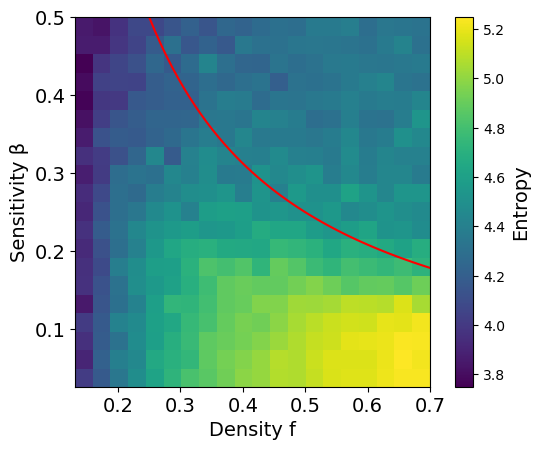

In [38]:
fig, ax = plt.subplots()
pheata=ax.imshow(np.transpose(avgcb),aspect=5/4,origin='lower',extent=[pinis[1],pinis[-1],senses[1],senses[-1]])
# pheat.set_clim(3.8,5.2)
cbonea=fig.colorbar(pheata)
cbonea.set_label("Entropy",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Sensitivity β",fontsize=14)
plt.xlabel("Density f",fontsize=14)
plt.plot(np.linspace(0.25,0.7,50),np.power(8*np.linspace(0.25,0.7,50),-1),'r')
plt.show()